In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import string
from datetime import datetime


from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from utilidades.graficar import ver_dispersion
from utilidades.reducir_uso_memoria import reduce_mem_usage

### Preprocesamiento inicial

In [2]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"
ruta_submits = "../submits"
ruta_features = ruta_data + "/features/"

In [3]:
def to_ascii(s):
    car_ascii = set(string.printable)
    return "".join([a for a in s if a in car_ascii])

In [4]:
train_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/train_limpio.csv"))
test_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/test_limpio.csv"))

In [5]:
train_limpio = train_limpio.drop(["dia"], axis=1)
test_limpio = test_limpio.drop(["dia"], axis=1)

In [6]:
poblacion_train = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_train.csv")
poblacion_test = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_test.csv")

In [7]:
train_limpio["poblacion"] = poblacion_train
test_limpio["poblacion"] = poblacion_test

In [8]:
train_limpio = train_limpio.rename(columns={col: to_ascii(col) for col in train_limpio.columns})
test_limpio = test_limpio.rename(columns={col: to_ascii(col) for col in test_limpio.columns})

In [9]:
id_zona_train = pd.read_csv(f"{ruta_data}/id_zona_train.csv")
id_zona_test = pd.read_csv(f"{ruta_data}/id_zona_test.csv")

In [10]:
train_limpio["idzona"] = id_zona_train["idzona"]
test_limpio["idzona"] = id_zona_test["idzona"]

In [11]:
tiene_terraza = pd.read_csv(f"{ruta_data}/features/tiene_terraza_train.csv")

train_limpio["tiene_terraza"] = tiene_terraza

In [12]:
tiene_terraza_tes = pd.read_csv(f"{ruta_data}/features/tiene_terraza_test.csv")

test_limpio["tiene_terraza"] = tiene_terraza_tes

In [13]:
tiene_jardin = pd.read_csv(f"{ruta_data}/features/tiene_jardin_train.csv")

train_limpio["tiene_jardin"] = tiene_jardin

In [14]:
tiene_jardin_tes = pd.read_csv(f"{ruta_data}/features/tiene_jardin_test.csv")

test_limpio["tiene_jardin"] = tiene_jardin_tes

In [15]:
tiene_servicio = pd.read_csv(f"{ruta_data}/features/tiene_servicio_train.csv")

train_limpio["tiene_servicio"] = tiene_servicio

In [16]:
tiene_servicio_tes = pd.read_csv(f"{ruta_data}/features/tiene_servicio_test.csv")

test_limpio["tiene_servicio"] = tiene_servicio_tes

In [17]:
tiene_vestidor = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_train.csv")

train_limpio["tiene_vestidor"] = tiene_vestidor

In [18]:
tiene_vestidor_tes = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_test.csv")

test_limpio["tiene_vestidor"] = tiene_vestidor_tes

In [19]:
tiene_vista = pd.read_csv(f"{ruta_data}/features/tiene_vista_train.csv")

train_limpio["tiene_vista"] = tiene_vista

In [20]:
tiene_vista_tes = pd.read_csv(f"{ruta_data}/features/tiene_vista_test.csv")

test_limpio["tiene_vista"] = tiene_vista_tes

In [21]:
tiene_salon = pd.read_csv(f"{ruta_data}/features/tiene_salon_train.csv")

train_limpio["tiene_salon"] = tiene_salon

In [22]:
tiene_salon_tes = pd.read_csv(f"{ruta_data}/features/tiene_salon_test.csv")

test_limpio["tiene_salon"] = tiene_salon_tes

In [23]:
tiene_cuarto = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_train.csv")

train_limpio["tiene_cuarto"] = tiene_cuarto

In [24]:
tiene_cuarto_tes = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_test.csv")

test_limpio["tiene_cuarto"] = tiene_cuarto_tes

In [25]:
tiene_family = pd.read_csv(f"{ruta_data}/features/tiene_family_train.csv")

train_limpio["tiene_family"] = tiene_family

In [26]:
tiene_family_tes = pd.read_csv(f"{ruta_data}/features/tiene_family_test.csv")

test_limpio["tiene_family"] = tiene_family_tes

In [27]:
tiene_bosque = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_train.csv")

train_limpio["bosque_dir"] = tiene_bosque

In [28]:
tiene_bosque_tes = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_test.csv")

test_limpio["bosque_dir"] = tiene_bosque_tes

In [29]:
tiene_avenida = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_train.csv")

train_limpio["avenida_dir"] = tiene_avenida

In [30]:
tiene_avenida_tes = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_test.csv")

test_limpio["avenida_dir"] = tiene_avenida_tes

In [31]:
tiene_fuente = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_train.csv")

train_limpio["fuente_dir"] = tiene_fuente

In [32]:
tiene_fuente_tes = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_test.csv")

test_limpio["fuente_dir"] = tiene_fuente_tes

In [33]:
#Empeoro

# tiene_vis = pd.read_csv(f"{ruta_data}/features/tiene_vista_dir_train.csv")

# train_limpio["vis_dir"] = tiene_vis

In [34]:
tiene_golf = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_train.csv")

train_limpio["golf_dir"] = tiene_golf

In [35]:
tiene_golf_tes = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_test.csv")

test_limpio["golf_dir"] = tiene_golf_tes

In [36]:
# conceptos_train = pd.read_csv(f"{ruta_features}lsa_descripciones_train_100.csv")

In [37]:
# conceptos_train = reduce_mem_usage(conceptos_train)

In [38]:
# train_limpio = pd.concat([train_limpio, conceptos_train], axis=1)

---

### Corrida sin usar descripciones

In [39]:
# X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100121)

In [41]:
"""y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train_l)
param = {
'num_leaves': 300,
"learning_rate": 0.01,
"num_iterations": 16000,
"feature_fraction":0.6,
"max_bin": 1500,
"verbosity": 2shap.summary_plot(shap_vals, X_train, max_display=30, feature_names=feature_names)

}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)
pred = np.exp(pred)"""

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [42]:
"""# 505433
mean_absolute_error(y_test, pred)"""

499212.96473554015

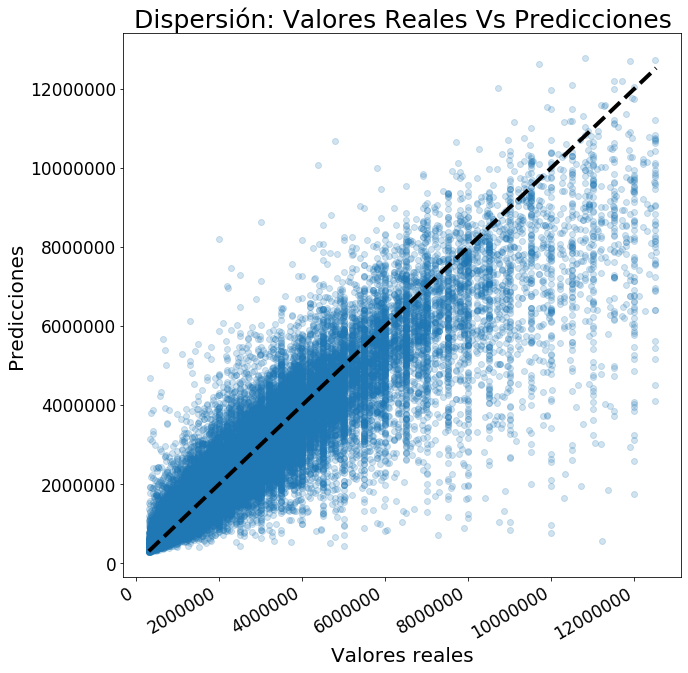

In [43]:
# ver_dispersion(y_test, pred)

---

### Corrida usando las descripciones, asegurarse de tener los csv con las descripciones hasheadas, sino las tenes corre el notebook de _feature_hashing_descripciones_ reemplazando _cantidad_de_dimensiones_ por el valor que quieras

In [44]:
n_dimensiones = 1000

In [45]:
desc_train = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_train_{n_dimensiones}d.csv")

In [46]:
desc_test = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_test_{n_dimensiones}d.csv")

In [47]:
desc_train = reduce_mem_usage(desc_train)

In [48]:
desc_test = reduce_mem_usage(desc_test)

In [53]:
tit_train = pd.read_csv(f"{ruta_data}/features/titulos_vectorizados_train_50d.csv")

In [54]:
tit_test = pd.read_csv(f"{ruta_data}/features/titulos_vectorizados_test_50d.csv")

In [55]:
tit_train = reduce_mem_usage(tit_train)

In [56]:
tit_test = reduce_mem_usage(tit_test)

In [57]:
# train_limpio = pd.concat([train_limpio, desc_train], axis=1)

In [58]:
train_limpio = pd.concat([train_limpio, desc_train, tit_train], axis=1)

In [59]:
# test_limpio = pd.concat([test_limpio, desc_test], axis=1)

In [60]:
test_limpio = pd.concat([test_limpio, desc_test, tit_test], axis=1)

In [61]:
X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100121)

In [39]:
%%time 
y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train_l)
param = {
'num_leaves': 300,
"learning_rate": 0.01,
"num_iterations": 16000,
"feature_fraction":0.6,
"max_bin": 1500
}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [ ]:
%%time 
pred = reg.predict(X_test)
pred = np.exp(pred)

In [40]:
mean_absolute_error(y_test, pred)

488738.73973566096

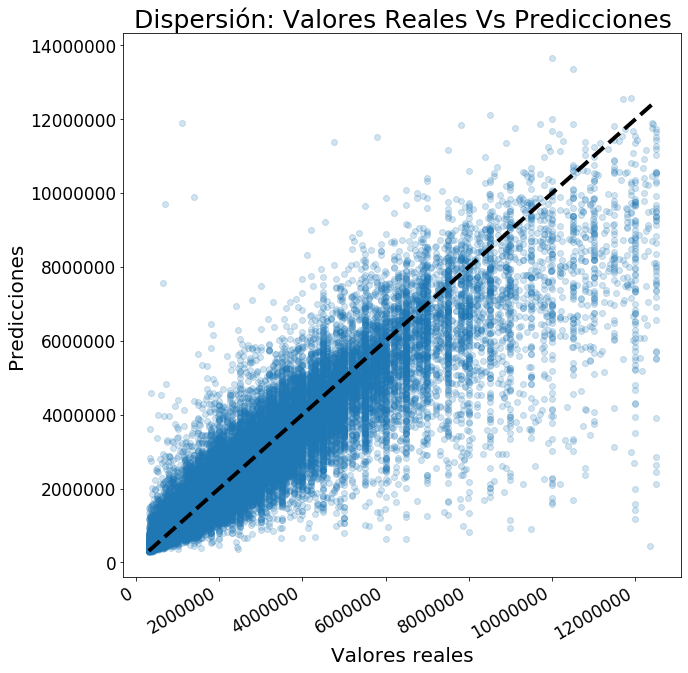

In [41]:
ver_dispersion(y_test, pred)

### Para generar un submit

In [62]:
%%time
y_l = np.log(y)
d_train = lgb.Dataset(X, label= y_l)
param = {
'num_leaves': 300,
"learning_rate": 0.01,
"num_iterations": 16000,
"feature_fraction":0.6,
"max_bin": 1500
}
reg = lgb.train(param, d_train)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [63]:
%%time 
pred_test = reg.predict(test_limpio)
pred_test = np.exp(pred_test)

In [64]:
ids_test = pd.read_csv(f"{ruta_data}/ids_test.csv")

In [65]:
ids_test["target"] = pred_test

#### Ponele algun nombre al csv

In [66]:
ids_test.to_csv(f"{ruta_submits}/nombree.csv",index=False)